In [8]:
# 📦 Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [9]:
# Load dataset
df = pd.read_csv('Google_Stock_Train (2010-2022).csv')  # Replace with actual path



In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [11]:
# df.isnull().sum()
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


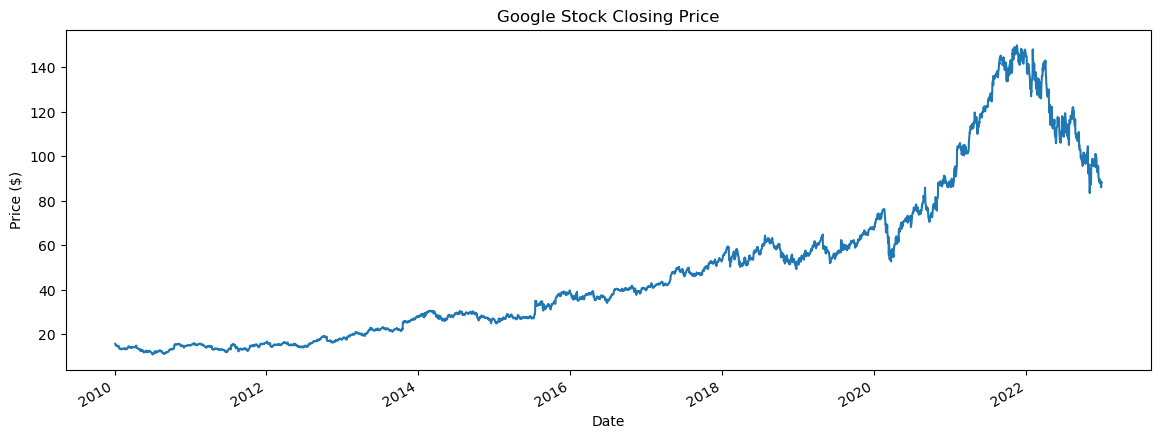

In [12]:
df = df[['Date', 'Close']]  # We'll use only the closing price
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the closing price
df['Close'].plot(figsize=(14,5), title='Google Stock Closing Price')
plt.ylabel("Price ($)")
plt.show()

In [13]:
# 📉 Step 3: Use only the 'Close' column for prediction
data = df['Close'].values.reshape(-1, 1)

In [32]:
data

array([[15.684434],
       [15.615365],
       [15.221722],
       ...,
       [86.019997],
       [88.449997],
       [88.230003]])

In [33]:
# ⚖️ Step 4: Normalize the prices (range 0 to 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [19]:
data_scaled

array([[0.03434761],
       [0.03385045],
       [0.03101697],
       ...,
       [0.54062898],
       [0.55812033],
       [0.55653679]])

In [20]:
# 🔄 Step 5: Create sequences (past 60 days → predict next day)
X = []
y = []

sequence_length = 60  # You can change this value to experiment

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])  # past 60 days
    y.append(data_scaled[i, 0])  # next day

X, y = np.array(X), np.array(y)

# 🧠 RNN expects input shape (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [21]:
# 🏗️ Step 6: Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\anike\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0058 - val_loss: 0.0743
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7925e-04 - val_loss: 0.0541
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4787e-04 - val_loss: 0.0440
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4276e-04 - val_loss: 0.0371
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2816e-04 - val_loss: 0.0270
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1587e-04 - val_loss: 0.0245
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.0511e-04 - val_loss: 0.0216
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.4374e-05 - val_loss: 0.0169
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.5125e-05 - val_loss: 0.0154
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.4261e-05 - val_loss: 0.0126
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.9723e-05 - val_loss: 0.0133
Epoch 12/50
81/81 ━━━━━

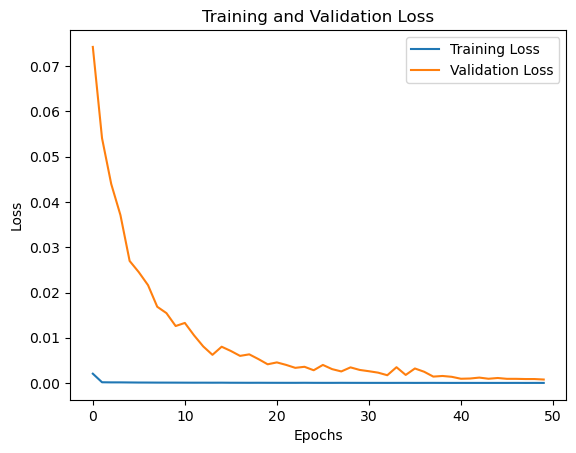

In [23]:
# 📊 Step 8: Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [24]:
# 🔮 Step 9: Predict on the training data to evaluate performance
predicted_scaled = model.predict(X)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [25]:
# 🔁 Step 10: Inverse transform to get actual prices
predicted = scaler.inverse_transform(predicted_scaled.reshape(-1, 1))
actual = scaler.inverse_transform(y.reshape(-1, 1))


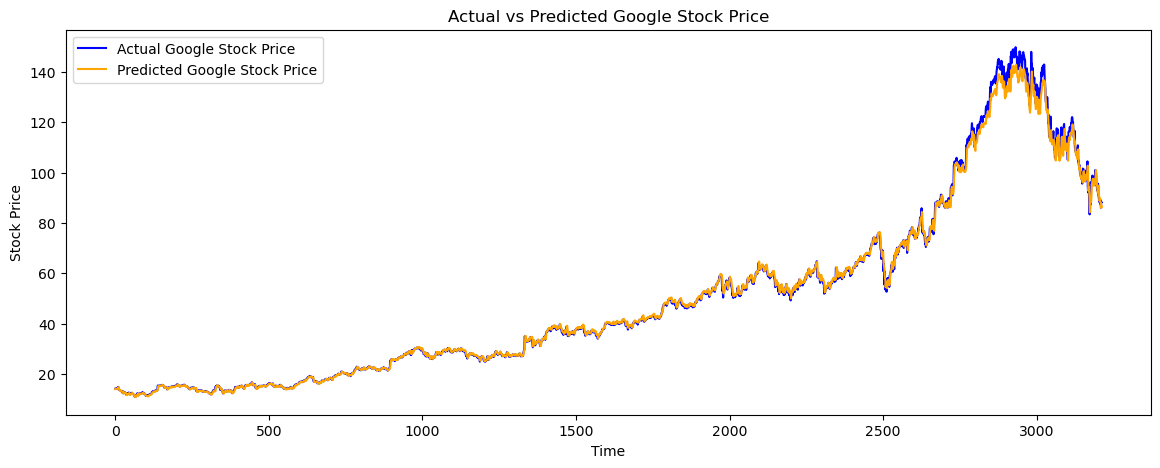

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(actual, color='blue', label='Actual Google Stock Price')
plt.plot(predicted, color='orange', label='Predicted Google Stock Price')
plt.title('Actual vs Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
# 🧮 Step 12: Evaluation metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.98
Root Mean Squared Error (RMSE): 1.86
R² Score: 1.00
